In [1]:
import os
import numpy as np
from glob import glob
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

%matplotlib inline

In [2]:
def plot_scalability(cases, logscale=False, stride=False, xlabel="#cores", ylabel="cost (pe-hrs/simyr)"):
    fig = plt.figure(figsize=(10, 4), dpi= 150)
    ax1 = fig.add_subplot(121)
    ax2 =  fig.add_subplot(122)
    
    max_wtime = 0
    min_wtime = int(1e9)
    for case in cases:
        npes = [i for i in case if type(i)==int]
        ttime = [case[i][0] for i in case if type(i)==int]
        wtime = [case[i][1] for i in case if type(i)==int]
        max_wtime = max(max(wtime),max_wtime)
        min_wtime = min(min(wtime),min_wtime)
        
        ax1.plot(npes, ttime, label=case["name"])
        ax1.plot(npes, ttime, '.', color='black')
        ax2.plot(npes, wtime, label=case["name"])
        ax2.plot(npes, wtime, '.', color='black')

        
    ax1.tick_params(axis='y')
    ax2.tick_params(axis='y')
    
    if stride:
        ax1.set_xlabel("io_stride")
        ax2.set_xlabel("io_stride")
    else:
        ax1.set_xlabel(xlabel)
        ax2.set_xlabel(xlabel)   
    ax1.set_ylabel("throughput (simyear/day)") 
    ax2.set_ylabel(ylabel)

    if logscale:
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax1.set_xticks(npes)
        ax1.get_xaxis().set_major_formatter(tck.ScalarFormatter())
        ax1.get_yaxis().set_major_formatter(tck.ScalarFormatter())
    else:
        ax1.set_xticks(npes)
     
    if logscale:
        ax2.set_xscale("log")
        ax2.set_yscale("log")
        ax2.set_xticks(npes)
        ax2.set_yticks(np.arange(min_wtime,max_wtime,(max_wtime-min_wtime)/3.))
        ax2.get_xaxis().set_major_formatter(tck.ScalarFormatter())
        ax2.get_yaxis().set_major_formatter(tck.ScalarFormatter())
    else:
        ax2.set_xticks(npes)
    ax2.set_ylim([650,1000])

    
    ax1.legend()
    #ax2.legend()
    
    plt.show()


```
DT = 1800.0
DT_THERM = 7200
THERMO_SPANS_COUPLING = True
DIABATIC_FIRST = False
```

In [4]:
ice72 = {"name": "NTASKS_OTHER=72",
    288 : [12.17, 709.65],
    360 : [14.92, 694.96],
    432 : [16.72, 723.37],
    504 : [18.39, 751.57],
    720 : [22.99, 826.69],
        }

ice108 = {"name": "NTASKS_OTHER=108",
    360 : [14.46, 776.89],
    432 : [17.27, 750.29],
    504 : [18.53, 792.81],
    #576 : [20.66, 794.44],
    720 : [24.84, 800.11],
    864 : [27.03, 863.02],
    1008 : [17.21, 1555.91]      
         }
ice144 = {"name": "NTASKS_OTHER=144",
    720 : [24.54, 844.82],
    864 : [27.35, 884.41],
         }

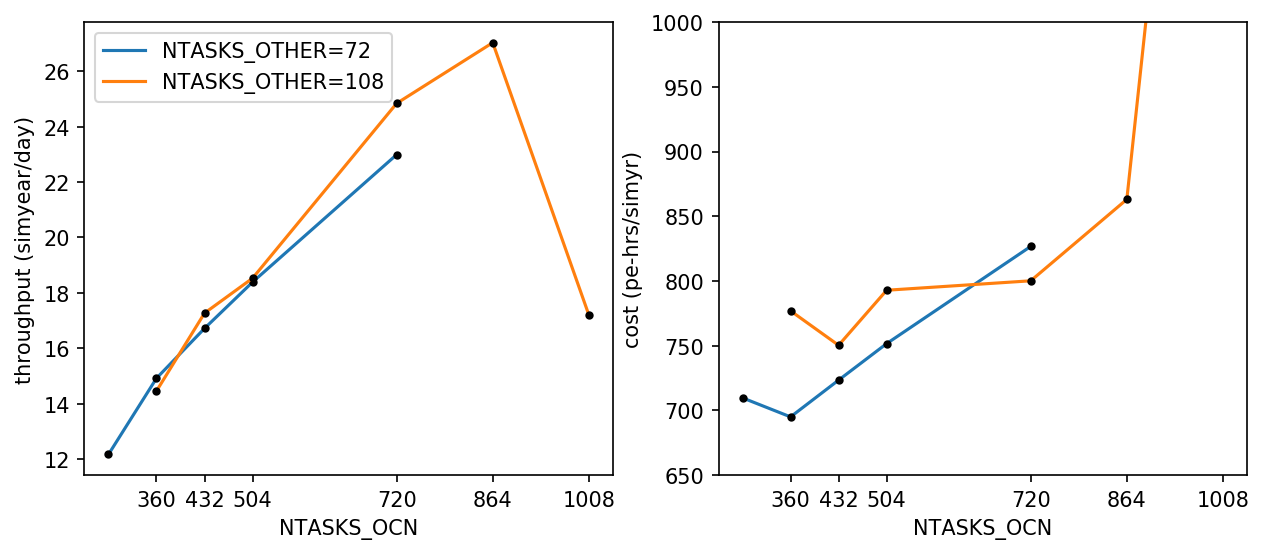

In [6]:
#plot_scalability([ice144, ice72, ice108], xlabel="NTASKS_OCN")
plot_scalability([ice72, ice108], xlabel="NTASKS_OCN")

# MOM6 Timestepping pseudocode:

```
DT = 1800.0
DT_THERM = 7200
THERMO_SPANS_COUPLING = False
DIABATIC_FIRST = False

NTASKS_OCN=864
STOP_N 3 months
```

-----------------------------

<pre>
<code>
<i>! The main MOM6 timestepping routine </i>
<b>step_mom()</b> </b> <font color="FF0000">82%</font>

    <i>! Ocean dynamics, including the momentum and continuity </i>
    <b>do i=1,4</b>
        <b>step_mom_dynamics()</b> <font color="FF0000">50%</font>
            <b>...()</b>
            <b>continuity()</b> <font color="FF0000">5%</font>   
            <b>btstep()</b> <font color="FF0000">14%</font>
            <b>...()</b>

    <i>! The tracer advection </i>
    <b>step_mom_tracer_dyn()</b> <font color="FF0000">4%</font> 
    
    <i>! Diabatic processes and remapping </i>
    <b>step_mom_thermo()</b> <font color="FF0000">10%</font> 
        <b>diabatic()</b> <font color="FF0000">8%</font>
            <b>kpp()</b> <font color="FF0000">4.5%</font> 
        <b>ALE()</b> <font color="FF0000">2%</font> 
</code>
</pre>